In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen

D:\Work\prog\github\Новая папка (2)\masslib\mass.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


Text(0.5, 1.0, '2794 formules')

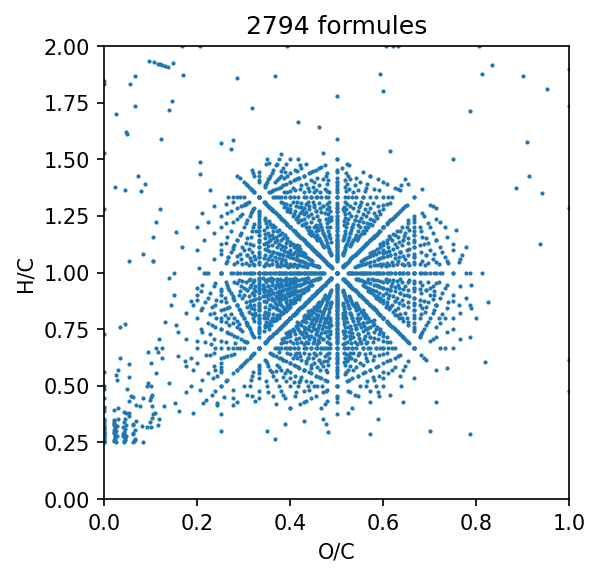

In [5]:
mapper = {"m/z": "mass", "I": "I"}
fa = MassSpectrum().load("data/fa.csv",
                         mapper=mapper,
                         sep=',',
                         ignore_columns=["Name", "I %", "Res.", "S/N"])
H = 1.007825
fa.table['mass'] -= H

fa = fa.assign_test(elems='CHO').drop_unassigned()

vk = VanKrevelen(fa.table, name="Test VK")

fig, ax = plt.subplots(figsize=(4,4), dpi = 150)

ax.scatter(vk.table["O/C"], vk.table["H/C"], s = 1)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
ax.set_xlabel('O/C')
ax.set_ylabel('H/C')
ax.set_title(f'{fa.table.shape[0]} formules')

In [6]:
mapper = {"mw": "mass", "relativeAbundance": "I"}
fa_tr = MassSpectrum().load("data/fa_th.csv",
                            mapper = mapper,
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
                           )

Text(0.5, 1.0, '3312 formules')

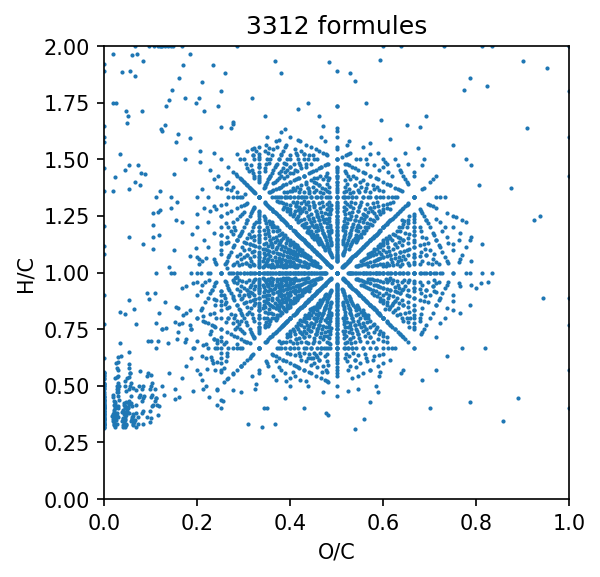

In [7]:
vk_tr = VanKrevelen(fa_tr.table, name="Test VK")

fig, ax = plt.subplots(figsize=(4,4), dpi = 150)

ax.scatter(vk_tr.table["O/C"], vk_tr.table["H/C"], s = 1)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
ax.set_xlabel('O/C')
ax.set_ylabel('H/C')
ax.set_title(f'{fa_tr.table.shape[0]} formules')

In [8]:
fa.table['N'] = 0
fa.table['S'] = 0

In [9]:
common = fa & fa_tr
vk_com = VanKrevelen(common.table, name="Test VK")
common.table

,mass,I,numbers,assign,O/C,H/C,C,H,O,N,S
825,214.063455,5125033.0,2.0,1.0,0.230769,0.769231,13.0,10.0,3.0,0.0,0.0
2121,218.058505,9330196.0,2.0,1.0,0.333333,0.833333,12.0,10.0,4.0,0.0,0.0
1992,220.074115,7887905.0,2.0,1.0,0.333333,1.000000,12.0,12.0,4.0,0.0,0.0
1283,222.053315,6984809.0,2.0,1.0,0.454545,0.909091,11.0,10.0,5.0,0.0,0.0
333,222.089705,4103743.0,2.0,1.0,0.333333,1.166667,12.0,14.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
427,834.222815,7922267.0,2.0,1.0,0.552632,1.105263,38.0,42.0,21.0,0.0,0.0
1068,834.237645,10928767.0,2.0,1.0,0.428571,1.000000,42.0,42.0,18.0,0.0,0.0
1893,836.217345,8590649.0,2.0,1.0,0.463415,0.975610,41.0,40.0,19.0,0.0,0.0
1273,846.201165,9742160.0,2.0,1.0,0.452381,0.904762,42.0,38.0,19.0,0.0,0.0


In [10]:
dif = fa ^ fa_tr
vk_dif = VanKrevelen(dif.table, name="Test VK")
dif.table

,mass,I,numbers,assign,O/C,H/C,formula,C,H,O,N,S
1339,204.079235,5.072918e+06,1.0,1.0,0.250000,1.000000,NaN,12.0,12.0,3.0,0.0,0.0
1470,205.087060,1.094660e-02,1.0,NaN,0.250000,1.166667,H14_C12_O3_Cc(-1),12.0,14.0,3.0,0.0,0.0
1091,208.037745,6.721187e+06,1.0,1.0,0.500000,0.800000,NaN,10.0,8.0,5.0,0.0,0.0
403,208.074195,4.015701e+06,1.0,1.0,0.363636,1.090909,NaN,11.0,12.0,4.0,0.0,0.0
908,209.045570,1.450332e-02,1.0,NaN,0.500000,1.000000,H10_C10_O5_Cc(-1),10.0,10.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,999.364920,2.294937e-02,1.0,NaN,0.358491,1.132075,H60_C53_O19_Cc(-1),53.0,60.0,19.0,0.0,0.0
195,999.387630,1.864499e-02,1.0,NaN,0.420000,1.280000,H64_C50_O21_Cc(-1),50.0,64.0,21.0,0.0,0.0
1638,999.548420,2.082369e-02,1.0,NaN,0.241379,1.379310,H80_C58_O14_Cc(-1),58.0,80.0,14.0,0.0,0.0
415,999.589780,1.825609e-02,1.0,NaN,0.346154,1.692308,H88_C52_O18_Cc(-1),52.0,88.0,18.0,0.0,0.0


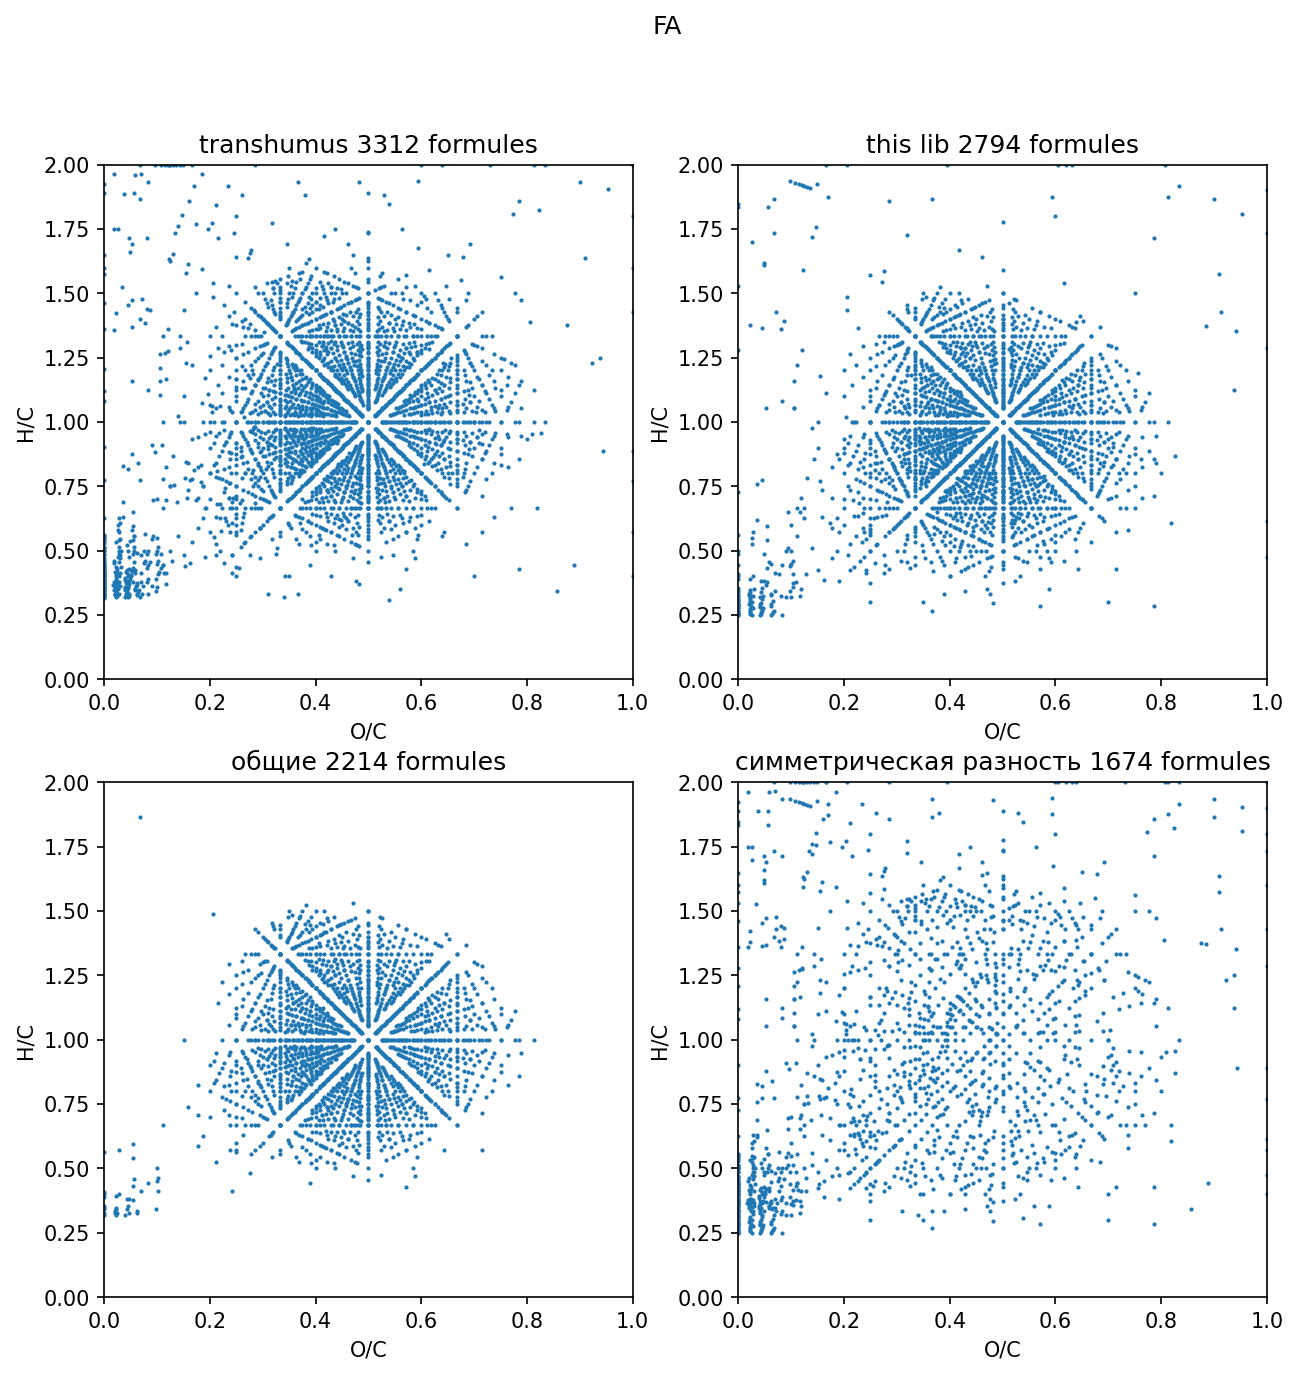

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), dpi = 150)
fig.suptitle('FA')

tables = [vk_tr.table, vk.table, vk_com.table, vk_dif.table]
names = ['transhumus', 'this lib', 'общие', 'симметрическая разность']

for ite in range(4):
    i = ite//2
    j = ite%2
    vk = VanKrevelen(tables[ite], name="Test VK")
    ax[i][j].scatter(tables[ite]["O/C"], tables[ite]["H/C"], s = 1)
    ax[i][j].set_xlim(0,1)
    ax[i][j].set_ylim(0,2)
    ax[i][j].set_xlabel('O/C')
    ax[i][j].set_ylabel('H/C')
    ax[i][j].set_ylabel('H/C')
    ax[i][j].set_title(f'{names[ite]} {tables[ite].shape[0]} formules')